In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset
%matplotlib inline

In [20]:
# 导入数据，“_orig”代表这里是原始数据，我们还要进一步处理才能使用：
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
#由数据集获取一些基本参数，如训练样本数m，图片大小：
m_train = train_set_x_orig.shape[0]  #训练集大小209
m_test = test_set_x_orig.shape[0]    #测试集大小50
num_px = train_set_x_orig.shape[1]  #图片宽度64，大小是64×64
#将图片数据向量化（扁平化）：
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
#对数据进行标准化：
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
print(train_set_x.shape)
print(train_set_y.shape)
print(test_set_x.shape)
print(test_set_y.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


In [4]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

def propagate(w, b, X, Y):
    """
    传参:
    w -- 权重, shape： (num_px * num_px * 3, 1)
    b -- 偏置项, 一个标量
    X -- 数据集，shape： (num_px * num_px * 3, m),m为样本数
    Y -- 真实标签，shape： (1,m)

    返回值:
    cost， dw ，db，后两者放在一个字典grads里
    """
    #获取样本数m：
    m = X.shape[1]

    # 前向传播 ：
    A = sigmoid(np.dot(w.T,X)+b)    #调用前面写的sigmoid函数    
    cost = -(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))/m                 

    # 反向传播：
    dZ = A-Y
    dw = (np.dot(X,dZ.T))/m
    db = (np.sum(dZ))/m

    #返回值：
    grads = {"dw": dw,
             "db": db}

    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    #定义一个costs数组，存放每若干次迭代后的cost，从而可以画图看看cost的变化趋势：
    costs = []
    #进行迭代：
    for i in range(num_iterations):
        # 用propagate计算出每次迭代后的cost和梯度：
        grads, cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]

        # 用上面得到的梯度来更新参数：
        w = w - learning_rate*dw
        b = b - learning_rate*db

        # 每100次迭代，保存一个cost看看：
        if i % 100 == 0:
            costs.append(cost)

        # 这个可以不在意，我们可以每100次把cost打印出来看看，从而随时掌握模型的进展：
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    #迭代完毕，将最终的各个参数放进字典，并返回：
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))

    A = sigmoid(np.dot(w.T,X)+b)
    for  i in range(m):
        if A[0,i]>0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0

    return Y_prediction

In [15]:
def logistic_model(X_train,Y_train,X_test,Y_test,learning_rate=0.1,num_iterations=2000,print_cost=False):
    #获特征维度，初始化参数：
    dim = X_train.shape[0]
    W,b = initialize_with_zeros(dim)

    #梯度下降，迭代求出模型参数：
    params,grads,costs = optimize(W,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    W = params['w']
    b = params['b']

    #用学得的参数进行预测：
    prediction_train = predict(W,b,X_train)
    prediction_test = predict(W,b,X_test)

    #计算准确率，分别在训练集和测试集上：
    accuracy_train = 1 - np.mean(np.abs(prediction_train - Y_train))
    accuracy_test = 1 - np.mean(np.abs(prediction_test - Y_test))
    print("Accuracy on train set:",accuracy_train )
    print("Accuracy on test set:",accuracy_test )

   #为了便于分析和检查，我们把得到的所有参数、超参数都存进一个字典返回出来：
    d = {"costs": costs,
         "Y_prediction_test": prediction_test , 
         "Y_prediction_train" : prediction_train , 
         "w" : W, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_acy":accuracy_train,
         "test_acy":accuracy_test
        }
    return d

In [19]:
d = logistic_model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Accuracy on train set: 0.9904306220095693
Accuracy on test set: 0.7


In [21]:
d['costs']

[0.6931471805599453,
 0.5845083636993088,
 0.46694904094655476,
 0.3760068669480209,
 0.33146328932825125,
 0.30327306747438293,
 0.27987958658260487,
 0.2600421369258757,
 0.24294068467796617,
 0.2280042225672606,
 0.2148195137844964,
 0.20307819060644988,
 0.19254427716706862,
 0.18303333796883506,
 0.17439859438448874,
 0.1665213970540033,
 0.15930451829756614,
 0.15266732471296504,
 0.14654223503982342,
 0.14087207570310156]

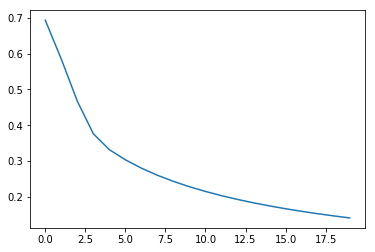

In [22]:
plt.plot(np.squeeze(d['costs']))